# Unsupervised Learning

# K-means

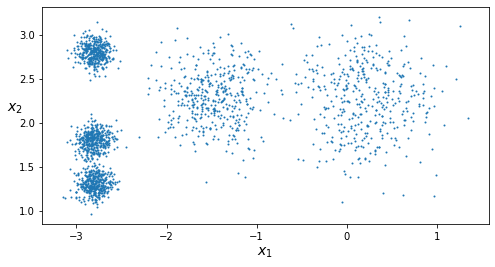

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()    

In [4]:
from sklearn.cluster import KMeans

In [8]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# Clustering for Image Segmentation

In [11]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
image = imread('images/ladybug.png')
image.shape

(533, 800, 3)

In [3]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [9]:
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

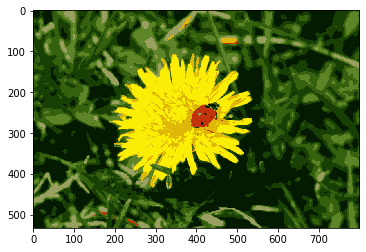

In [12]:
plt.imshow(segmented_img)